In [5]:
from openai import OpenAI
import pandas as pd
client = OpenAI()
df = pd.read_csv('sentences.csv')
# Limit the DataFrame to the first 1000 rows
df = df.head(100)

def translate(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of gpt api on Darija translation to English."+
             "Target audience: Darija Computational linguists."
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect sentence into English using sentence-by-sentence translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},
            {"role": "user", "content": "هوما مخبّيين شي حاجة, أنا متيقّن!"},
            {"role": "assistant", "content": "They're hiding something, I'm sure!"},
            {"role": "user", "content":  f"{arb}" }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df['transl'])

0              They are hiding something, I am certain!
1               Seems like they're trying to stay cool.
2     The tourists don't seem to be enjoying themsel...
3           They will definitely get in trouble for it!
4                      The characters are well-written!
                            ...                        
95                      Literally, his door is blocked.
96                               What's wrong with you?
97     One of you guys can discuss this issue with her.
98    She doesn't have enough trust in the relations...
99    Alright, let's try to discuss it without any o...
Name: transl, Length: 100, dtype: object


4 hours for 1000 sentence

In [24]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['transl']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


[(2, 'They are hiding something, I am certain!', "They're hiding something, I'm sure!", 0.9722087979316711, True), (3, "Seems like they're trying to stay cool.", "It's obvious they're trying to keep their cool.", 0.9153831601142883, True), (4, "The tourists don't seem to be enjoying themselves very much.", "the hotels don't seem very comfortable.", 0.8296469449996948, True), (5, 'They will definitely get in trouble for it!', 'he is probably about to be laid off by head office!', 0.4730525016784668, False), (6, 'The characters are well-written!', "of course he's depressive!", 0.41489386558532715, False), (7, 'He/she will come back later!', "I think I'm going to leave!", 0.6117156744003296, False), (8, 'I see what you mean.', 'hand me that bag.', 0.5744116306304932, False), (9, "He's going to get sick!", "I'm going to be sick!", 0.9631972312927246, True), (10, 'I always knew that she wanted us to die.', 'I always knew she wanted us dead', 0.9428467154502869, True), (11, 'I want to know h

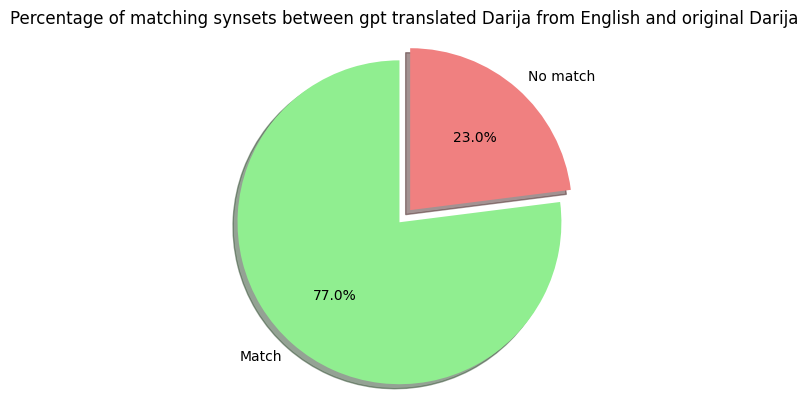

In [25]:

# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()

'He will cover the expenses until the next three months.', 'We will cover all the material up to next Tuesday', 0.6612762212753296, False


'He started reading early!', 'so start studying soon!', 0.7224154472351074, True

# what could be next? see what's lacking in the ouput in the model's output.

# work on idioms:
# recheck papers for the idioms how they went all the way for a very specific culture or equivalence.